## Ankle Calculation
With this Notebook we read out the Data from every .csv-File in the given directory (csv_files), store it into multiple DFs and visulize it. 

* We get an initial overview of the data and their anomalies. 
* We select the relevant points for the upcoming tasks and compare them in different situations.
* We carry out an initial univariate outlier detection, in which we identify and visualize abnormalities.

Requirements
* .csv-Files

## Setup

In [255]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Get Data
* Reading Data from all CSV Files and save it to multiple Dataframes. 
* Storing every df into a Dictionary for further purposes

In [256]:
df_dict_all = {}

csvFilesPath = os.getcwd()+"/csv_files/finalCsv/"
csvFiles = os.listdir(csvFilesPath)

for fileName in csvFiles:
    #print(fileName)
    pre, ext = os.path.splitext(fileName)
    file = csvFilesPath + fileName

    if "Joggen" in pre:
        df = pd.read_csv(file)
        df_dict_all[pre] = df
        if len(df) < 1798:
            print(pre)

amountDataframes = len(df_dict_all)
amountColumns = len(df.columns.tolist())
amountRows = len(df)
amountData = amountDataframes*amountColumns*amountRows

print(f'{amountDataframes} DataFrames')
print(f'{amountColumns} columns per Dataframe ')
print(f'{amountRows} rows per Dataframe')
print(f'{amountData} DataCells')

10 DataFrames
41 columns per Dataframe 
1799 rows per Dataframe
737590 DataCells


* 10 Runner
* 3 paces per runner
* 2 perspectives per pace 
> 10 x 3 x 2 = 60 Dataframes


* 1800 Frames per Dataframe --> 1800 Frames / 60 seconds = 30 Frames per Second
* 132 Columns per Dataframe --> 33 Pivot points x 4 Columns per Pivotpoint


> Für die 33 relevanten Keypoints gibt es in jedem Dataframe 4 Spalten mit Werten:
* x -->  Bildbreite (Werte normalisiert auf [0,0, 1,0])
* y -->  Bildhöhe (Werte normalisiert auf [0,0, 1,0])
* z -->  Bildtiefe (Werte normalisiert auf [0,0, 1,0])
* v -->  Sichtbarkeit (Werte normalisiert auf [0,0, 1,0]) 



In [257]:
df_dict_all.keys()

dict_keys(['Joggen_1', 'Joggen_10', 'Joggen_2', 'Joggen_3', 'Joggen_4', 'Joggen_5', 'Joggen_6', 'Joggen_7', 'Joggen_8', 'Joggen_9'])

In [258]:
df = df_dict_all["Joggen_8"]
df.columns
df = df * -1
df = df + 1
df.head()

,Unnamed: 0,x_left_hip,y_left_hip,z_left_hip,v_left_hip,x_right_hip,y_right_hip,z_right_hip,v_right_hip,x_left_knee,...,z_right_heel,v_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,v_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,v_right_foot_index
0,1,0.723596,0.479980,0.548917,0.000132,0.707509,0.483800,0.429650,0.000954,0.715222,...,0.451056,0.284575,0.675060,0.196673,0.528145,0.014531,0.672883,0.235611,0.458082,0.171472
1,0,0.726037,0.485146,0.546191,0.000191,0.729643,0.484793,0.426466,0.001010,0.694822,...,0.453923,0.266858,0.656864,0.199956,0.528071,0.014149,0.706482,0.231654,0.464884,0.160278
2,-1,0.728443,0.490090,0.539032,0.000221,0.729829,0.488658,0.418231,0.001000,0.679164,...,0.456694,0.246597,0.608449,0.200440,0.528359,0.013111,0.793645,0.230427,0.469855,0.146988
3,-2,0.737002,0.492356,0.537111,0.000274,0.730903,0.491005,0.418867,0.001008,0.679115,...,0.466343,0.226680,0.559390,0.203368,0.530204,0.012175,0.878009,0.234410,0.474930,0.133878
4,-3,0.736251,0.492395,0.536214,0.000307,0.728697,0.491374,0.424980,0.000988,0.673556,...,0.481210,0.207875,0.512329,0.210789,0.536911,0.011169,0.909445,0.241756,0.484863,0.121702


## Analyse und Visualisierung

### Bestimmung des Zeitpunkts der Winkelberechnung

### Vergleich meherer Gelenkpunkte 
* seitliche Ansicht und y-Bewegung zur Feststellung des Zeitpunkts für die Berechnung des Winkels
* hintere Ansicht und x-Bewegung zur Berechnung des Winkels

In [259]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]

fig_knee = px.line(df, y="y_left_heel", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="y_left_foot_index")
fig_ankle.update_traces(line= dict(
    color = "green"
))

fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.show()

ERKENTNISSE: Vorgehen für Berechnung des Zeitpunkts

Wie erkennt das modell die richtigen Abschnitte???
* Erkennen wann Ferse aufsetzt
* Erkennen wann Fußspitze ferse schneidet

evtl. mithilfe der Außschläge herausfinden in welchem Frameabschnitte die genannten ereignisse auftreten


 *Auffällig: das Muster lässt eigentlich vermuten, dass die Werte vermutlich spiegelverkehrt sind * 


In [260]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]
#df_backRight = df[backAnkleRight]

fig_knee = px.line(df, y="z_left_knee", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="z_left_ankle")
fig_heel = px.line(df, y="z_left_heel")
fig_heel_side = px.line(df, y="y_left_heel")

fig_ankle.update_traces(line= dict(
    color = "green"
))
fig_heel.update_traces(line= dict(
    color = "orange"
))
fig_heel_side.update_traces(line= dict(
    color = "red"
))
fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.add_trace(fig_heel.data[0], )
fig_knee.add_trace(fig_heel_side.data[0], )

fig_knee.show()

## Functions for Calculation

In [285]:
def intersection_points(slope, intercept, x0, y0, radius):
    x_points = []
    y_points = []

    a = 1 + slope**2
    b = -2.0*x0 + 2*slope*(intercept - y0)
    c = x0**2 + (intercept-y0)**2 - radius**2
 
    delta = b**2 - 4.0*a*c  
    x1 = (-b + np.sqrt(delta)) / (2.0 * a)
    x2 = (-b - np.sqrt(delta)) / (2.0 * a)
 
    x_points.append(x1)
    x_points.append(x2)
 
    y1 = slope*x1 + intercept
    y2 = slope*x2 + intercept
 
    y_points.append(y1)
    y_points.append(y2)
 
    return x_points, y_points

def get_angle(x, y, x0, y0, radius):
 
    base = x - x0
    hypotenuse = radius
    theta = np.arccos(base / hypotenuse)
    if y-y0 < 0:
        theta = 2*np.pi - theta
    return theta

import matplotlib.pyplot as plt
import numpy as np

def calcAngle(frame):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1

    r = 0.2
    
    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2

    theta_list = []
    
    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
    
        theta_list.append(get_angle(x, y, x0, y0, r))

    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:
            print(1)
            p1 = theta_list[1]
            p2 = theta_list[2]
        if ankle_x < heel_x and ankle_y < heel_y:
            print(2)
            p1 = theta_list[0]
            p2 = theta_list[3]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]
        if ankle_x > heel_x and ankle_y < heel_y:
            print(6)
            p1 = theta_list[3]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
        if ankle_x < heel_x and ankle_y < heel_y:
            print(8)
            p1 = theta_list[1]
            p2 = theta_list[3]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    return angle_in_degree

import matplotlib.pyplot as plt
import numpy as np

def drawAngle(frame):
    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    l = np.linspace(-6, 6, 100)
    
    plt.figure(figsize=(8, 8))

    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.title('Plot an angle using Python')
    plt.plot(l, l*a1+b1)
    plt.plot(l, l*a2+b2)
    
    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1
    plt.scatter(x0, y0, color='midnightblue')

    plt.scatter(knee_x, knee_y, color='blue')
    plt.scatter(ankle_x, ankle_y, color='green')
    plt.scatter(heel_x, heel_y, color='violet')
    plt.text(knee_x, knee_y, 'knee', color='blue')
    plt.text(ankle_x, ankle_y, 'ankle', color='green')
    plt.text(heel_x, heel_y, 'heel', color='violet')

    theta = np.linspace(0, 2*np.pi, 100)
    r = 0.2
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    plt.plot(x1, x2, color='green', linestyle='dotted')

    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2
    
    plt.scatter(x_points[1], y_points[1], color='crimson')
    plt.scatter(x_points[2], y_points[2], color='crimson')
    plt.scatter(x_points[3], y_points[3], color='crimson')
    plt.scatter(x_points[0], y_points[0], color='crimson')
    
    plt.text(x_points[1], y_points[1], '  P1', color='black')
    plt.text(x_points[2], y_points[2], '  P2', color='black')
    plt.text(x_points[3], y_points[3], '  P3', color='black')
    plt.text(x_points[0], y_points[0], '  P0', color='black')
    
    theta_list = []
    
    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
        theta_list.append(get_angle(x, y, x0, y0, r))

    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:
            print(1)
            p1 = theta_list[1]
            p2 = theta_list[2]
        if ankle_x < heel_x and ankle_y < heel_y:
            print(2)
            p1 = theta_list[0]
            p2 = theta_list[3]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]
        if ankle_x > heel_x and ankle_y < heel_y:
            print(6)
            p1 = theta_list[3]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
        if ankle_x < heel_x and ankle_y < heel_y:
            print(8)
            p1 = theta_list[1]
            p2 = theta_list[3]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund

    theta = np.linspace(p1, p2, 100)
    
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    
    plt.plot(x1, x2, color='black')
    
    mid_angle = (p1 + p2) / 2.0
    
    x_mid_angle = (r-0.5) * np.cos(mid_angle) + x0
    y_mid_angle = (r-0.5) * np.sin(mid_angle) + y0
    
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)
    
    plt.text(x_mid_angle, y_mid_angle, angle_in_degree, fontsize=12)
    
    plt.scatter(x_points[1], y_points[1], color='red')
    plt.scatter(x_points[2], y_points[2], color='red')
    plt.scatter(x_points[3], y_points[3], color='red')
    plt.scatter(x_points[0], y_points[0], color='red')
    plt.show()

## Manuelle Bestimmung der Frames des Auftritts

Alle Geschwindigkeiten der Läufer: 1, 4, 5, 7 

In [262]:
frames_gehen_1 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_gehen_4 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_gehen_5 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_gehen_7 = [[3,4,5,6,7], [3,4,5,6,7], ]

frames_joggen_1 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_joggen_4 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_joggen_5 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_joggen_7 = [[3,4,5,6,7], [3,4,5,6,7], ]

frames_laufen_1 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_laufen_4 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_laufen_5 = [[3,4,5,6,7], [3,4,5,6,7], ]
frames_laufen_7 = [[3,4,5,6,7], [3,4,5,6,7], ]
# ...

## Actual Angle Calculation 
Expanding DF with angles

In [286]:
angle_list = []
for f in range(0,len(df)):
    angle = calcAngle(f)
    angle_list.append(angle)
df["angle"] = angle_list


3
3
3
3
5
6
8
7
8
8
7
7
7
7
3
3
3
3
1
1
1
3
3
3
3
2
8
8
6
6
8
5
6
5
5
5
3
3
3
3
3
3
3
3
3
3
5
6
6
6
6
6
5
5
5
5
5
3
3
3
1
1
1
3
3
3
3
6
6
6
6
6
6
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
7
8
6
6
5
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
3
6
5
6
6
6
5
3
3
5
3
3
3
1
1
1
1
3
3
3
3
3
7
7
6
6
6
5
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
6
6
5
5
5
5
5
3
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
6
8
8
8
6
6
5
5
7
3
3
3
3
3
3
3
3
3
3
3
3
7
8
6
6
6
5
5
7
7
1
3
3
3
3
3
3
3
3
3
3
3
6
8
6
6
6
6
5
5
1
1
3
3
3
3
3
3
3
3
3
3
3
6
8
6
6
6
6
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
7
6
6
6
6
6
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
4
6
6
6
6
5
5
5
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
6
8
6
6
6
6
5
1
1
1
3
3
3
3
3
1
3
3
3
3
3
3
2
8
6
6
6
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
3
6
5
6
6
6
6
5
7
7
3
3
3
3
3
3
3
3
3
3
3
3
5
6
8
6
6
6
5
5
5
5
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
5
5
5
3
3
3
1
1
1
1
3
3
3
3
3
4
8
8
8
8
8
7
7
7
5
5
3
3
3
3
3
3
3
3
3
5
6
6
6
8
6
6
5
5
5
5
5
3
3
3
1
1
1
1
3
3
3
3
8
8
6
6
6
6
5
5
5
5


In [264]:

df["y_left_heel"][3]*-1+1


# y_heel: 0.719 
#  [1.0]
# y_heel: 0.746 
#  [2.0]
# y_heel: 0.739 
#  [3.0]

# y_heel: 0.747 
#  [3.0]


0.7442495226860046

In [287]:
ind_list = range(7, 11)
df["angle"].iloc[ind_list]

7     62.6
8     90.3
9     94.7
10     2.6
Name: angle, dtype: float64

In [288]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl
df["angle"]

fig_knee = px.line(df, y="angle", title='Angle')

fig_knee.show()

## Visulize Angles for X Frames

1


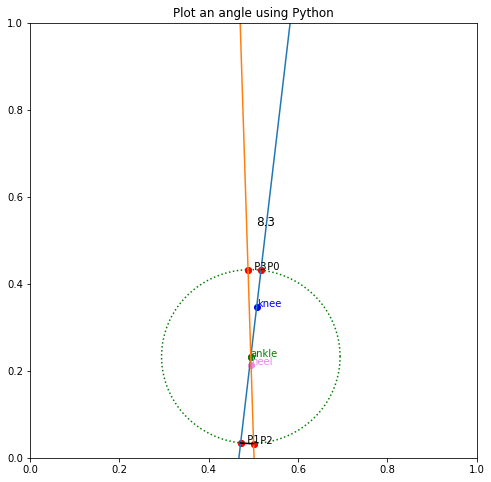

3


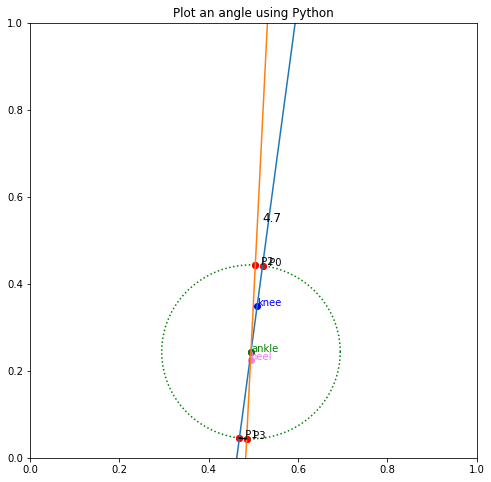

3


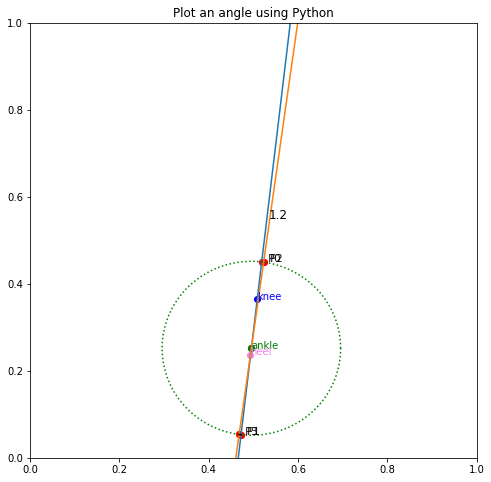

3


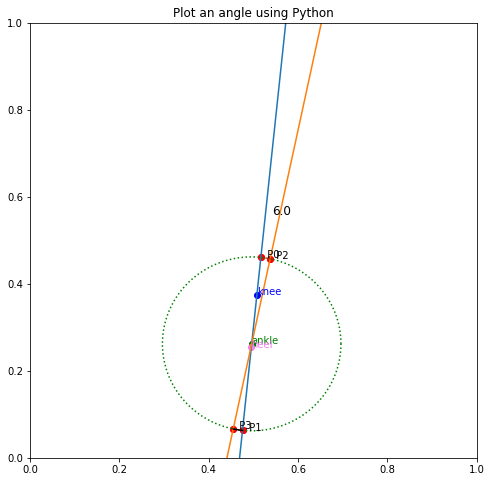

3


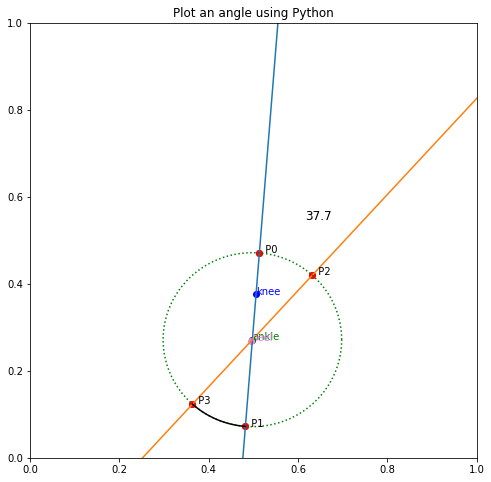

2


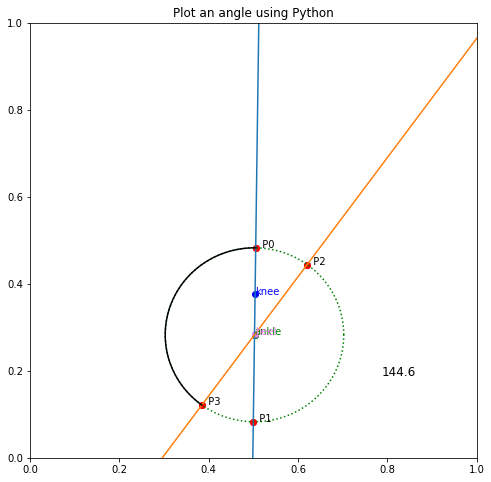

8


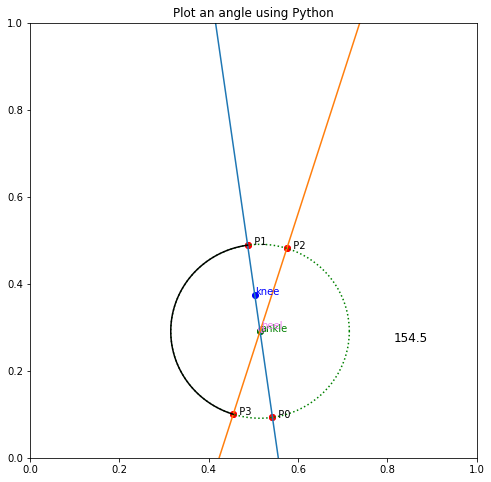

8


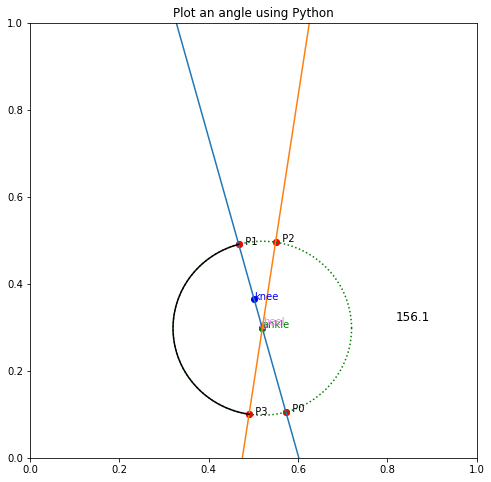

6


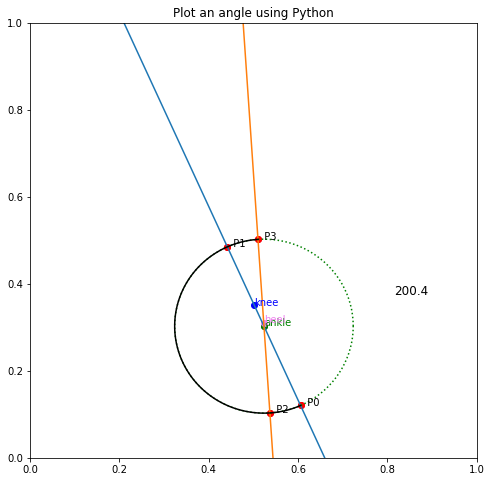

6


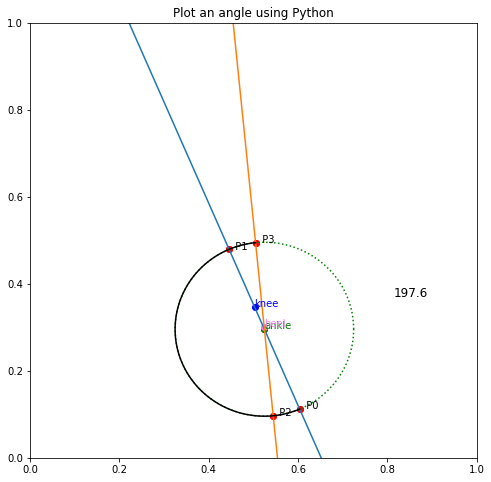

8


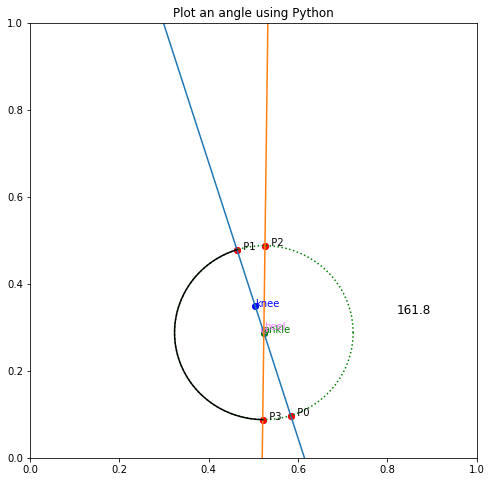

5


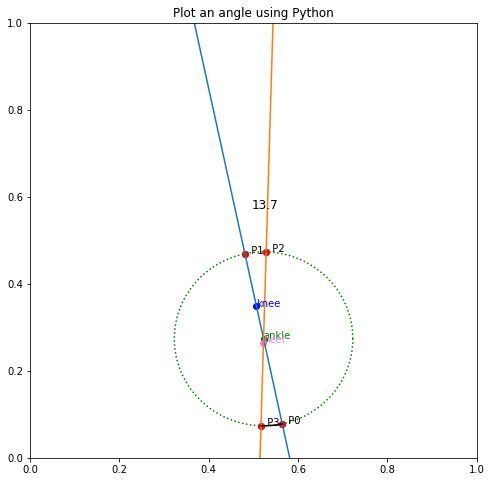

6


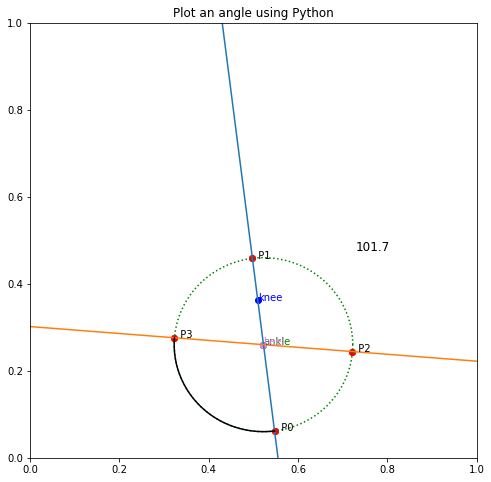

5


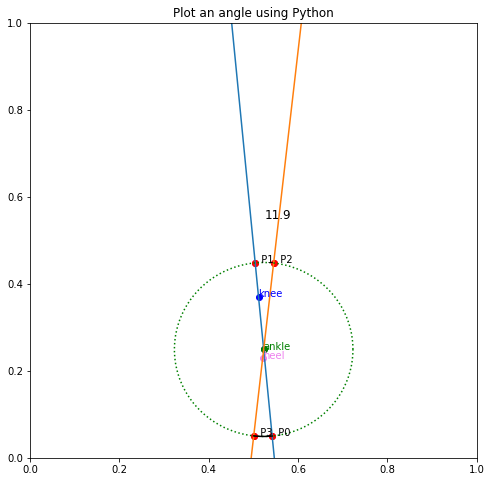

5


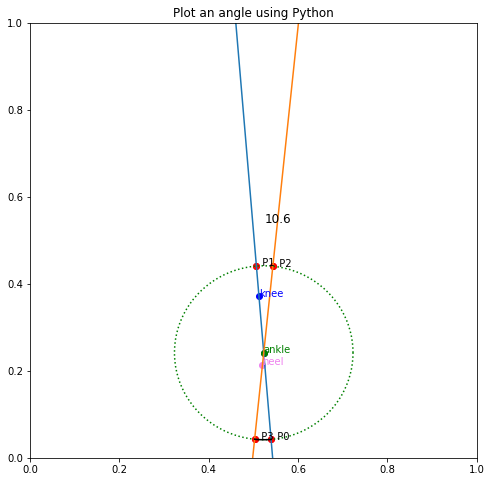

5


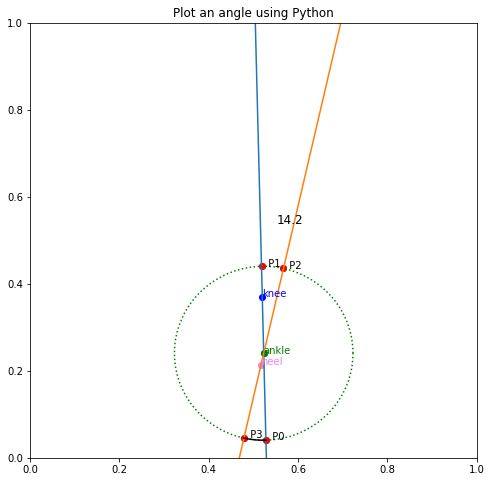

3


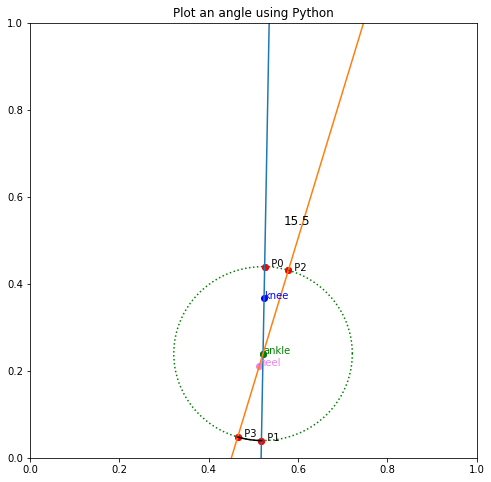

3


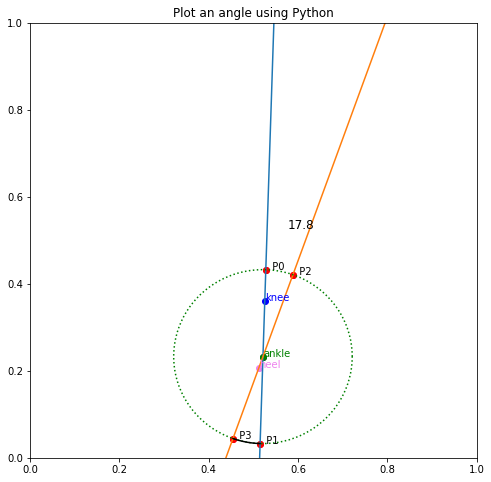

3


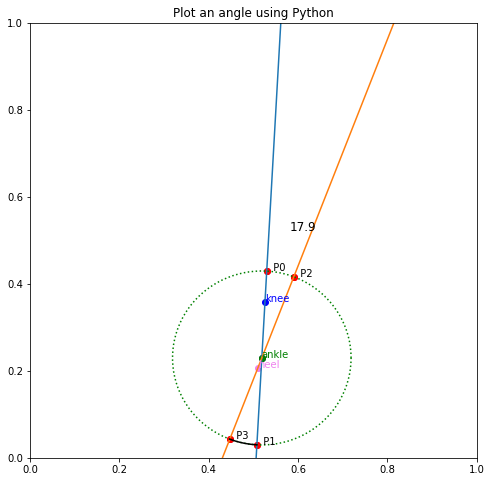

3


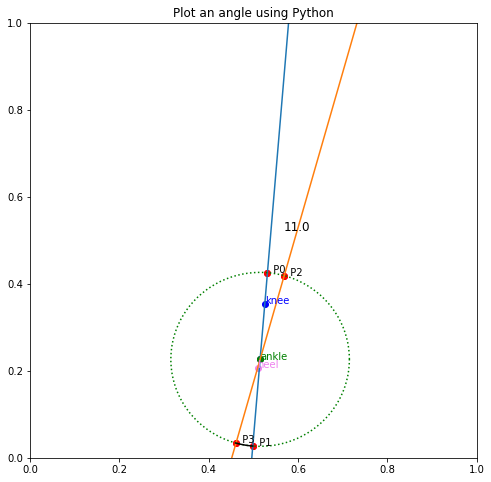

In [284]:
for f in range(20, 40):
    drawAngle(f)

## Mittelwertberechnung

## Fußauftritt